<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [21]:
import pandas as pd
import psycopg2

In [104]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 

In [105]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [24]:
# текст запроса
query_3_1 = f'''
    SELECT DISTINCT COUNT(name)
    FROM VACANCIES
'''

In [26]:
# результат запроса
df_vac = pd.read_sql_query(query_3_1, connection)
display(f'Количество вакансий: {df_vac["count"].loc[df_vac.index[0]]}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\3648272166.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_vac = pd.read_sql_query(query_3_1, connection)


'Количество вакансий: 49197'

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [27]:
# текст запроса
query_3_2 = f'''
    SELECT DISTINCT COUNT(name)
    FROM EMPLOYERS
'''

In [28]:
# результат запроса
df_emp = pd.read_sql_query(query_3_2, connection)
display(f'Количество работодателей: {df_emp["count"].loc[df_emp.index[0]]}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\1766967368.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_emp = pd.read_sql_query(query_3_2, connection)


'Количество работодателей: 23501'

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [29]:
# текст запроса
query_3_3 = f'''
    SELECT DISTINCT COUNT(name)
    FROM AREAS
'''

In [31]:
# результат запроса
df_area = pd.read_sql_query(query_3_3, connection)
display(f'Количество регионов: {df_area["count"].loc[df_area.index[0]]}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\4196209174.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_area = pd.read_sql_query(query_3_3, connection)


'Количество регионов: 1362'

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [32]:
# текст запроса
query_3_4 = f'''
    SELECT DISTINCT COUNT(name)
    FROM INDUSTRIES
'''

In [33]:
# результат запроса
df_ind = pd.read_sql_query(query_3_4, connection)
display(f'Количество сфер деятельности: {df_ind["count"].loc[df_ind.index[0]]}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\246732189.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ind = pd.read_sql_query(query_3_4, connection)


'Количество сфер деятельности: 294'

***

## Выводы:
Подключились к базе данных, узнали количество записей в таблицах:

* Количество вакансий в базе: 49197
* Количество работодателей в базе: 23501
* Количество регионов в базе: 1362
* Количество сфер деятельности в базе: 294

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [34]:
# текст запроса
query_4_1 = f'''
    SELECT 
        a.name AS "Город",
        COUNT(v.id) AS "Количество вакансий"
    FROM AREAS a
    JOIN VACANCIES v ON a.id = v.area_id
    GROUP BY a.id
    ORDER BY 2 DESC
    LIMIT 5
'''

In [35]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
display(df)

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\234815181.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection)


,Город,Количество вакансий
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [36]:
# текст запроса
query_4_2 = f'''
    SELECT 
        COUNT(*)
    FROM VACANCIES v
    WHERE salary_from IS NOT NULL or salary_to IS NOT NULL
'''

In [37]:
# результат запроса
salary = pd.read_sql_query(query_4_2, connection)
display(f'Количество вакансий: {salary["count"].loc[df.index[0]]}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\171702051.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary = pd.read_sql_query(query_4_2, connection)


'Количество вакансий: 24073'

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [38]:
# текст запроса
query_4_3 = f'''
    SELECT 
        round(AVG(salary_from)) AS "Среднее нижняя граница",
        round(AVG(salary_to)) AS "Среднее верхняя граница"
    FROM VACANCIES
'''

In [39]:
# результат запроса
aver_salary = pd.read_sql_query(query_4_3, connection)
display(f'Среднее нижняя граница: {int(aver_salary["Среднее нижняя граница"].loc[aver_salary.index[0]])}')
display(f'Среднее верхняя граница: {int(aver_salary["Среднее верхняя граница"].loc[aver_salary.index[0]])}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\1317759501.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aver_salary = pd.read_sql_query(query_4_3, connection)


'Среднее нижняя граница: 71065'

'Среднее верхняя граница: 110537'

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [40]:
# текст запроса
query_4_4 = f'''
    SELECT 
        schedule,
        employment, 
        COUNT(*)
    FROM VACANCIES
    GROUP BY 1, 2 
    ORDER BY 3 DESC
    OFFSET 1
    LIMIT 1
    '''

In [41]:
# результат запроса
schedule_employ = pd.read_sql_query(query_4_4, connection)
display(f'Вторая пара по популярности: {schedule_employ["schedule"].loc[schedule_employ.index[0]]} / {schedule_employ["employment"].loc[schedule_employ.index[0]]} ({schedule_employ["count"].loc[schedule_employ.index[0]]})')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\370524762.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schedule_employ = pd.read_sql_query(query_4_4, connection)


'Вторая пара по популярности: Удаленная работа / Полная занятость (7802)'

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [112]:
# текст запроса
query_4_5 = f'''
    SELECT 
        experience AS "Опыт работы",
        COUNT(*) AS "Количество вакансий"
    FROM VACANCIES 
    GROUP BY 1
    ORDER BY 2 ASC
'''

In [113]:
# результат запроса
exp_need = pd.read_sql_query(query_4_5, connection)
display(exp_need)

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\2107054523.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  exp_need = pd.read_sql_query(query_4_5, connection)


,Опыт работы,Количество вакансий
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

## Вывод:

В ходе исследования выяснилось, что больше всего вакансий в самых больших городах. Также выяснили средние значения верхней и нижний границы зарплат, их разница составляет более 39000 руб, однако здесь возможны искажения из-за влияния на результаты данных относящихся к крупным городам. Возможно необходимо провести более глубокий анализ.

Выяснили, что самая востребованный рабочий график - это удаленный при полной занятости.
Выяснили требования к стажу. Больше всего вакансий с требованиями к опыту работы от года, однако есть вакансии для людей и без опыта работы.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [44]:
# текст запроса
query_5_1 = f'''
    SELECT 
        e.name,
        COUNT(v.id)
    FROM VACANCIES v
    JOIN EMPLOYERS e ON v.employer_id = e.id
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 5
'''

In [50]:
# результат запроса
place = pd.read_sql_query(query_5_1, connection)
display(f'Первое меcто: {place.iloc[0][0]}')
display(f'Пятое меcто: {place.iloc[4][0]}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\4218376894.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  place = pd.read_sql_query(query_5_1, connection)
C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\4218376894.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Первое меcто: {place.iloc[0][0]}')


'Первое меcто: Яндекс'

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\4218376894.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Пятое меcто: {place.iloc[4][0]}')


'Пятое меcто: Газпром нефть'

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [51]:
# текст запроса
query_5_2 = f'''
    SELECT 
	    a.name,
	    COUNT(DISTINCT v.id) vac,
	    COUNT(DISTINCT e.id) emp
    FROM AREAS a
    LEFT JOIN VACANCIES v ON v.area_id = a.id
    LEFT JOIN EMPLOYERS e ON e.area = a.id 
	WHERE v.id is NULL
	GROUP BY 1
	ORDER BY emp DESC
	LIMIT 1
'''

In [52]:
# результат запроса
region = pd.read_sql_query(query_5_2, connection)
display(f'Регион в котором больше всего работодателей, но нет вакансий: {region.iloc[0][0]}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\2651869083.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  region = pd.read_sql_query(query_5_2, connection)
C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\2651869083.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Регион в котором больше всего работодателей, но нет вакансий: {region.iloc[0][0]}')


'Регион в котором больше всего работодателей, но нет вакансий: Россия'

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [53]:
# текст запроса
query_5_3 = f'''
    SELECT 
	employer_id,
	COUNT(DISTINCT area_id) 
    FROM VACANCIES v
	GROUP BY 1
	ORDER BY 2 DESC
	LIMIT 1 
'''

In [54]:
# результат запроса
region_vac = pd.read_sql_query(query_5_3, connection)
display(f'Максимальное количество регионов одного работодателя: {region_vac.iloc[0][1]}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\2776538916.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  region_vac = pd.read_sql_query(query_5_3, connection)
C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\2776538916.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Максимальное количество регионов одного работодателя: {region_vac.iloc[0][1]}')


'Максимальное количество регионов одного работодателя: 181'

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [55]:
# текст запроса
query_5_4 = f'''
    SELECT 
        COUNT(*)
    FROM EMPLOYERS e
    LEFT JOIN EMPLOYERS_INDUSTRIES ei on e.id = ei.employer_id
    WHERE ei.industry_id is NULL
'''

In [56]:
# результат запроса
not_emp = pd.read_sql_query(query_5_4, connection)
display(f'Количество работадателей, у которых не указана сфера деятельности: {int(not_emp.iloc[0])}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\585317753.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  not_emp = pd.read_sql_query(query_5_4, connection)
C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\585317753.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(f'Количество работадателей, у которых не указана сфера деятельности: {int(not_emp.iloc[0])}')


'Количество работадателей, у которых не указана сфера деятельности: 8419'

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [57]:
# текст запроса
query_5_5 = f'''
    SELECT 
		e.name
    FROM EMPLOYERS e
    LEFT JOIN EMPLOYERS_INDUSTRIES ei on e.id = ei.employer_id
	GROUP BY e.id
    HAVING count(ei.industry_id) = 4
	ORDER BY e.name
	OFFSET 2 
	LIMIT 1
'''

In [58]:
# результат запроса
comp_name = pd.read_sql_query(query_5_5, connection)
display(f'Название компании: {comp_name.iloc[0]["name"]}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\1915816045.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  comp_name = pd.read_sql_query(query_5_5, connection)


'Название компании: 2ГИС'

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [59]:
# текст запроса
query_5_6 = f'''
SELECT 
   	COUNT(ei.employer_id)
FROM EMPLOYERS_INDUSTRIES ei
JOIN INDUSTRIES i on i.id = ei.industry_id
WHERE i.name LIKE 'Разработка программного обеспечения'
'''

In [60]:
# результат запроса
aw = pd.read_sql_query(query_5_6, connection)
display(f'Количество работодателей у которых в качестве сферы деятельности указана «Разработка программного обеспечения»: {int(aw.iloc[0])}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\3790889435.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  aw = pd.read_sql_query(query_5_6, connection)
C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\3790889435.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(f'Количество работодателей у которых в качестве сферы деятельности указана «Разработка программного обеспечения»: {int(aw.iloc[0])}')


'Количество работодателей у которых в качестве сферы деятельности указана «Разработка программного обеспечения»: 3553'

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [61]:
# код для получения списка городов-милионников
import urllib.parse as req

path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)
cities = tuple(pd.read_html(url)[1]['Город'])

In [62]:
# текст запроса
query_5_7 = f'''
(SELECT
    a.name,
   	COUNT(*) AS cnt
FROM EMPLOYERS e
JOIN VACANCIES v on e.id = v.employer_id
JOIN AREAS a on a.id = v.area_id
WHERE e.name = 'Яндекс' and a.name in {cities}
GROUP BY a.id)

UNION ALL

(SELECT
    'Total',
   	COUNT(*) AS cnt
FROM EMPLOYERS e
JOIN VACANCIES v on e.id = v.employer_id
JOIN AREAS a on a.id = v.area_id
WHERE e.name = 'Яндекс' and a.name in {cities})
'''

In [63]:
# результат запроса
yandex = pd.read_sql_query(query_5_7, connection)
display(yandex)
display(f'Количество строк в выборке: {yandex.shape[0]}')
display(f'Результат в строке Total: {int(yandex[yandex["name"] == "Total"]["cnt"])}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\167969961.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  yandex = pd.read_sql_query(query_5_7, connection)


,name,cnt
0,Total,485
1,Москва,54
2,Санкт-Петербург,42
3,Екатеринбург,39
4,Новосибирск,35
5,Волгоград,24
6,Воронеж,32
7,Краснодар,30
8,Красноярск,23
9,Нижний Новгород,36


'Количество строк в выборке: 17'

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\167969961.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(f'Результат в строке Total: {int(yandex[yandex["name"] == "Total"]["cnt"])}')


'Результат в строке Total: 485'

***

## Вывод:
Из результатов исследования мы узнали что пятёрка работодателей по количеству вакансий, это IT (Yaxdex) и нефтегазовое направление (Газпром нефть). Выявлен регион в котором есть работодатели, но нет вакансий это Россия. Можно предположить, что работодатели точно указывают регион с вакансиями, например есть работодатели, которые указывают вакансии в большом количестве регионов, максимум 181.

Выяснили, что треть работодателей не указывает свою сферу деятельности. Скорее всего это связано с тем, что работодатели указывают несколько сфер, так как такие работодатели присутствуют.

Выяснили, что 3553 работодателя (около 20%) указали в названии вакансии "Разработка программного обеспечения". Это говорит о нехватке специалистов в этой сфере.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [65]:
# текст запроса
query_6_1 = f'''
SELECT 
   	COUNT(*)
FROM VACANCIES
WHERE LOWER(name) LIKE '%data%' or LOWER(name) LIKE '%данн%'
'''

In [66]:
# результат запроса
vacancy = pd.read_sql_query(query_6_1, connection)
display(f'Вакансий имеет отношение к данным: {int(vacancy.iloc[0])}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\3665984037.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancy = pd.read_sql_query(query_6_1, connection)
C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\3665984037.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(f'Вакансий имеет отношение к данным: {int(vacancy.iloc[0])}')


'Вакансий имеет отношение к данным: 1771'

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [67]:
# текст запроса
query_6_2 = f'''
SELECT 
   	COUNT(*)
FROM VACANCIES
WHERE 
    (LOWER(name) LIKE '%data scientist%' or
    LOWER(name) LIKE '%data science%' or
	LOWER(name) LIKE '%исследователь данных%' or 
	(name LIKE '%ML%' and
    name NOT LIKE '%HTML%') or
	LOWER(name) LIKE '%machine learning%' or 
	LOWER(name) LIKE '%машинн%обучен%')
	and
	(LOWER(name) LIKE '%junior%' or
	LOWER(experience) LIKE '%нет опыта%' or
	LOWER(employment) LIKE '%стажировка%')
'''

In [68]:
# результат запроса
ds_vac = pd.read_sql_query(query_6_2, connection)
display(f'Количество подходящих вакансий: {int(ds_vac.iloc[0])}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\954507882.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_vac = pd.read_sql_query(query_6_2, connection)
C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\954507882.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(f'Количество подходящих вакансий: {int(ds_vac.iloc[0])}')


'Количество подходящих вакансий: 51'

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [69]:
# текст запроса
query_6_3 = f'''
SELECT 
   	count(*)
FROM VACANCIES
WHERE 
     (LOWER(name) LIKE '%data scientist%' or
    LOWER(name) LIKE '%data science%' or
	LOWER(name) LIKE '%исследователь данных%' or 
	(name LIKE '%ML%' and
    name NOT LIKE '%HTML%') or
	LOWER(name) LIKE '%machine learning%' or 
	LOWER(name) LIKE '%машинн%обучен%')
	and
	(key_skills LIKE '%SQL%' or
	key_skills LIKE '%postgres%')
'''

In [70]:
# результат запроса
sql_vac = pd.read_sql_query(query_6_3, connection)
display(f'Количество вакансий в которых в качестве ключевого навыка указан SQL или postgres: {int(sql_vac.iloc[0])}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\1861491074.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sql_vac = pd.read_sql_query(query_6_3, connection)
C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\1861491074.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(f'Количество вакансий в которых в качестве ключевого навыка указан SQL или postgres: {int(sql_vac.iloc[0])}')


'Количество вакансий в которых в качестве ключевого навыка указан SQL или postgres: 201'

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [71]:
# текст запроса
query_6_4 = f'''
SELECT 
   	count(*)
FROM VACANCIES
WHERE 
     (LOWER(name) LIKE '%data scientist%' or
    LOWER(name) LIKE '%data science%' or
	LOWER(name) LIKE '%исследователь данных%' or 
	(name LIKE '%ML%' and
    name NOT LIKE '%HTML%') or
	LOWER(name) LIKE '%machine learning%' or 
	LOWER(name) LIKE '%машинн%обучен%')
	and
    (key_skills LIKE '%Python%')
'''

In [72]:
# результат запроса
pyt_vac = pd.read_sql_query(query_6_4, connection)
display(f'Количество вакансий в которых в качестве ключевого навыка указан python: {int(pyt_vac.iloc[0])}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\3670520005.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pyt_vac = pd.read_sql_query(query_6_4, connection)
C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\3670520005.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(f'Количество вакансий в которых в качестве ключевого навыка указан python: {int(pyt_vac.iloc[0])}')


'Количество вакансий в которых в качестве ключевого навыка указан python: 351'

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [73]:
# текст запроса
query_6_5 = f'''
SELECT
   	ROUND(AVG(length(key_skills)-length(REPLACE(key_skills, CHR(9), ''))+1), 2)
FROM VACANCIES
WHERE 
     (LOWER(name) LIKE '%data scientist%' or
    LOWER(name) LIKE '%data science%' or
	LOWER(name) LIKE '%исследователь данных%' or 
	(name LIKE '%ML%' and
    name NOT LIKE '%HTML%') or
	LOWER(name) LIKE '%machine learning%' or 
	LOWER(name) LIKE '%машинн%обучен%')
'''

In [74]:
# результат запроса
ds_skill = pd.read_sql_query(query_6_5, connection)
display(f'Ключевых навыков в среднем указывают в вакансиях для DS: {float(ds_skill.iloc[0])}')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\1836964381.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_skill = pd.read_sql_query(query_6_5, connection)
C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\1836964381.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  display(f'Ключевых навыков в среднем указывают в вакансиях для DS: {float(ds_skill.iloc[0])}')


'Ключевых навыков в среднем указывают в вакансиях для DS: 6.41'

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [75]:
# текст запроса
query_6_6 = f'''
SELECT 
   	experience as experience,
   	ROUND(AVG(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to)), 0) AS average
FROM VACANCIES
WHERE 
     (LOWER(name) LIKE '%data scientist%' or
    LOWER(name) LIKE '%data science%' or
	LOWER(name) LIKE '%исследователь данных%' or 
	(name LIKE '%ML%' and
    name NOT LIKE '%HTML%') or
	LOWER(name) LIKE '%machine learning%' or 
	LOWER(name) LIKE '%машинн%обучен%') and  
    (salary_from IS NOT NULL or salary_to IS NOT NULL)
GROUP BY experience
'''

In [120]:
# результат запроса
average_salary = pd.read_sql_query(query_6_6, connection)
display(f'Средняя заработная плата дата-сайентиста с опытом работы от 3 до 6 лет: {int(average_salary[average_salary["experience"] == "От 3 до 6 лет"]["average"])} рублей')

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\2757929888.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  average_salary = pd.read_sql_query(query_6_6, connection)
C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\2757929888.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  display(f'Средняя заработная плата дата-сайентиста с опытом работы от 3 до 6 лет: {int(average_salary[average_salary["experience"] == "От 3 до 6 лет"]["average"])} рублей')


'Средняя заработная плата дата-сайентиста с опытом работы от 3 до 6 лет: 243115 рублей'

***

## Вывод:
Проанализировав данные мы выяснили что спрос на дата-сайнетистов как начинающих так и с опытом работы давольно велик. Эти же выводы можно сделать и относительно заработной платы специалистов, она выше чем у других вакансий, причём замечен значительный рост с увеличением опыта работы. Что касается ключевых навыков: в них фигурируют Python и SQL, причём требование к владению SQL имеет большее значение среди всех вакансий данного направления.

# Общий вывод по проекту

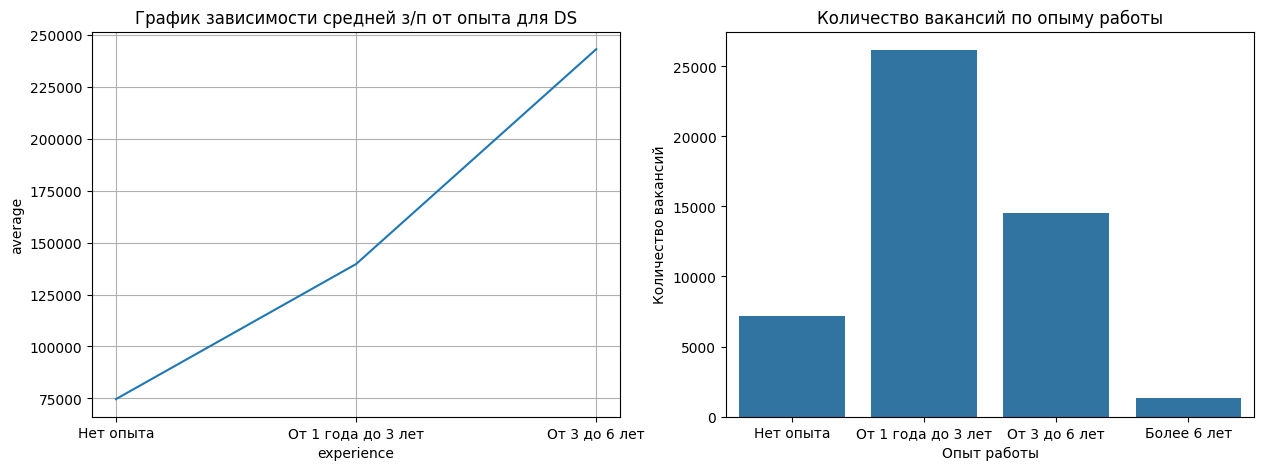

In [82]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes= plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(x='experience', y='average', data=average_salary, ax=axes[0])
sns.barplot(x='Опыт работы', y='Количество вакансий', data=exp_need, order=['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет'], ax=axes[1])
axes[0].set_title('График зависимости средней з/п от опыта для DS')
axes[1].set_title('Количество вакансий по опыту работы')
axes[0].grid(True)

Из визуализации видно, что самые востребованные специалисты для данной вакансии имеют опыт работы от одного до трёх лет, но также большое количество вакансий для кандидатов без опыта.
Отправим дополнительный запрос для сравнения показателей вакансий Дата-сайентистов и остальных вакансий:

In [123]:
extra_query = f'''
SELECT 
   	experience,
   	ROUND(AVG(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to)), 0) AS average_no_DS
FROM VACANCIES
GROUP BY experience
'''

In [124]:
ds_no_ds_comp = average_salary.merge(pd.read_sql_query(extra_query, connection), how='left')
ds_no_ds_comp

C:\Users\mrmon\AppData\Local\Temp\ipykernel_7884\819008729.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_no_ds_comp = average_salary.merge(pd.read_sql_query(extra_query, connection), how='left')


,experience,average,average_no_ds
0,Нет опыта,74643.0,40472.0
1,От 1 года до 3 лет,139675.0,76541.0
2,От 3 до 6 лет,243115.0,133211.0


Из результатов запроса видно, что заработная плата для вакансий относящихся к сфере Дата-сайенс более чем на 80% превышает средний уровень заработной платы вакансий не относящихся к данной сфере.

In [125]:
# не забываем закрыть соединение после окончания работы
connection.close()